#**GATHERING DATA**

In [1]:
import pandas as pd   #Library for manipualtion and filtering the data.
import numpy as np  #Library for scientific computing.
import matplotlib.pyplot as plt  #Library for Data visualization.
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
#Importing Insurance Dataset using read_csv in pandas.
df = pd.read_csv("insurance.csv")

In [3]:
#"head()" used to get first 5 rows of dataset.
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Sex       1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
#Extracting out the values count in columns using loop and "value_counts()".
column_value_count = ["Sex", "Children", "Smoker", "Region"]
for i in df[column_value_count]:
  print(df[i].value_counts())
  print("\n---------------------------------\n")

male      676
female    662
Name: Sex, dtype: int64

---------------------------------

0    574
1    324
2    240
3    157
4     25
5     18
Name: Children, dtype: int64

---------------------------------

no     1064
yes     274
Name: Smoker, dtype: int64

---------------------------------

southeast    364
southwest    325
northwest    325
northeast    324
Name: Region, dtype: int64

---------------------------------



###DATA PRE-PROCESSING

In [7]:
replace_num = {'Sex': {'male' : 0 , 'female' : 1} ,
                 'Smoker': {'no': 0 , 'yes' : 1},
                   'Region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
df.replace(replace_num, inplace = True)

In [8]:
#"describe()" used to give statistics for numerical parameteric column.
df.describe()

,Age,Sex,BMI,Children,Smoker,Region,Charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


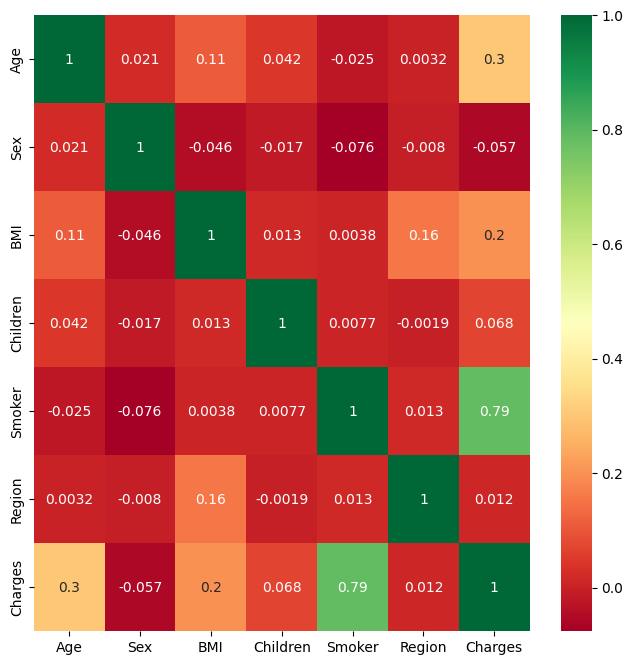

In [9]:
#Defining the correlation between the attributes.
corr_df = df.corr()
top_corr_fig = corr_df.index
plt.figure(figsize=(8,8))
sns.heatmap(df[top_corr_fig].corr(), annot=True, cmap ="RdYlGn")
plt.show()

In [10]:
#"nunique()" used to distinct values in each column in dataset.
df.nunique()

Age           47
Sex            2
BMI          548
Children       6
Smoker         2
Region         4
Charges     1337
dtype: int64

#**FEATURE ENGINEERING**

#####Column : BMI

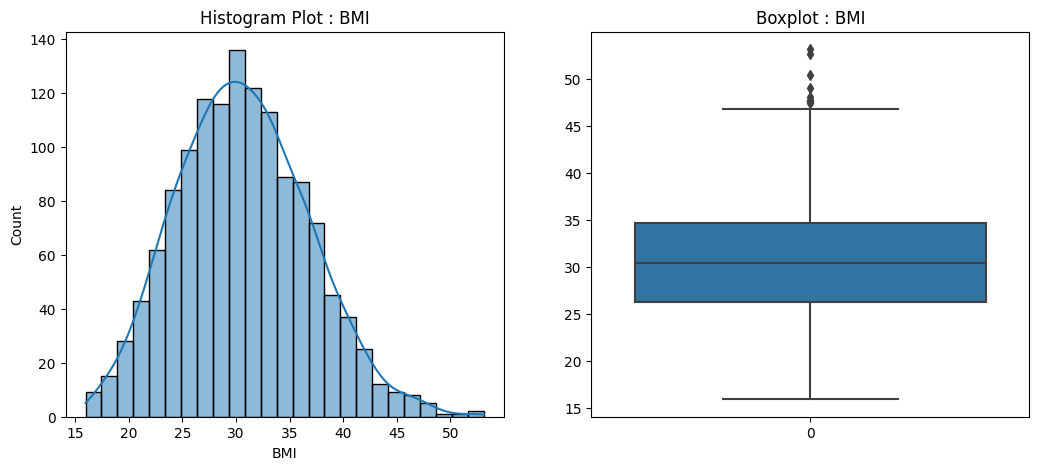


Before Removing Outliers :  0.2840471105987448 



In [11]:
plt.figure(figsize=(26,5))
plt.subplot(1,4,1)
sns.histplot((df["BMI"]), kde = True)
plt.title("Histogram Plot : BMI")

plt.subplot(1,4,2)
sns.boxplot(df["BMI"])
plt.title("Boxplot : BMI")
plt.show()

print("\nBefore Removing Outliers : ", df["BMI"].skew(),"\n")

Total rows removed : 9 

After Removing Outliers :  0.15851974406024358 



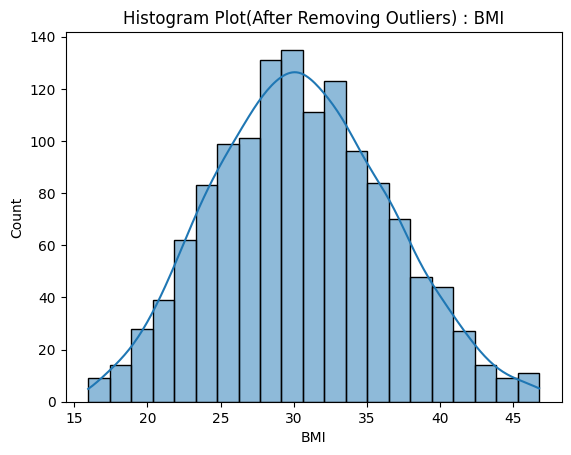

In [12]:
q3 = df["BMI"].quantile(0.75)
q1 = df["BMI"].quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

#Replacing outliers with NAN value.
outier = 0
for i in df["BMI"]:
  if i > upper:
    outier+=1
    df["BMI"].replace(i,np.nan, inplace = True)
print("Total rows removed :",outier,"\n")

#As the data is skewed, we will replace NAN value with Median value.
from sklearn.impute import SimpleImputer 
bmi = SimpleImputer(strategy='median') 
bmi_reshape = np.array(df["BMI"]).reshape(-1, 1)
df["BMI"] = bmi.fit_transform(bmi_reshape)

print("After Removing Outliers : ", df["BMI"].skew(),"\n")
sns.histplot(df["BMI"], kde = True)
plt.title("Histogram Plot(After Removing Outliers) : BMI")
plt.show()

#**EDA**

#**FEATURE SCALING**

In [13]:
#Dividing into Independent and Dependent Variable.
X = df.drop(["Charges"], axis=1)
y = df["Charges"]

In [14]:
#Splitting into training and test dataset with 75% and 25% on random state=0.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [15]:
#Getting the shape of training and test dataset.
print("Train : ",X_train.shape, y_train.shape)
print("Test : ",X_test.shape, y_test.shape)

Train :  (1003, 6) (1003,)
Test :  (335, 6) (335,)


In [16]:
X_train.head()

,Age,Sex,BMI,Children,Smoker,Region
1075,32,1,29.59,1,0,2
131,61,1,22.04,0,0,1
15,19,0,24.60,1,0,3
1223,20,1,24.42,0,1,2
1137,26,1,22.23,0,0,0


In [17]:
#Importing Standardization from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Using fit_transform to the train data.
X_train = scaler.fit_transform(X_train)

#"transform" only to avoid data leakage.
X_test = scaler.transform(X_test)

#**MODEL BUILDING**

##**LINEAR REGRESSION**

In [18]:
#Importing Linear Regression, R2 score, MSE and MAE from sklearn.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
lr = LinearRegression()

#Fitting the training independent and dependent variable to get trained.
lr.fit(X_train, y_train)

#Predicting the result for the test dataset "X_train".
y_pred_lr_train = lr.predict(X_train)
r2_score_lr_train = r2_score(y_pred_lr_train, y_train)

#Predicting the result for the test dataset "X_test".
y_pred_lr_test = lr.predict(X_test)
r2_score_lr_test = r2_score(y_pred_lr_test, y_test)

#Getting the MAE and MSE for Linear Regression.
rmse_linear = np.sqrt(mean_squared_error(y_pred_lr_test, y_test))
mae_linear = mean_absolute_error(y_pred_lr_test, y_test)

In [19]:
print('R2_score (train) : {0:.3f}'.format(r2_score_lr_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_lr_test))
print('RMSE LR : {0:.3f}'.format(rmse_linear))
print('MAE LR : {0:.3f}'.format(mae_linear))

R2_score (train) : 0.633
R2_score (test) : 0.722
RMSE LR : 5674.379
MAE LR : 4027.892


##**RANDOM FOREST**

#####Baseline Model

In [20]:
#Importing Linear Regression, R2 score, MSE and MAE from sklearn.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()

#Fitting the training independent and dependent variable to get trained.
rf.fit(X_train, y_train)

#Predicting the result for the test dataset "X_train".
y_pred_rf_train = rf.predict(X_train)
r2_score_rf_train = r2_score(y_pred_rf_train, y_train)

#Predicting the result for the test dataset "X_test".
y_pred_rf_test = rf.predict(X_test)
r2_score_rf_test = r2_score(y_pred_rf_test, y_test)

#Getting the MAE and MSE for Random Forest Regression.
rmse_rf = np.sqrt(mean_squared_error(y_pred_rf_test, y_test))
mae_rf = mean_absolute_error(y_pred_rf_test, y_test)

In [21]:
print('R2_score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE RF : {0:.3f}'.format(rmse_rf))
print('MAE RF : {0:.3f}'.format(mae_rf))

R2_score (train) : 0.971
R2_score (test) : 0.860
RMSE RF : 4544.819
MAE RF : 2727.550


#####Hypertuned Model

In [22]:
#Hyper parameter for Random Forest Regressor.
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
              }

#Defining a variable "rf_new" for hypertuned Model.
rf_new = RandomForestRegressor(random_state = 42)
rf_tune = GridSearchCV(estimator = rf_new, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

#Fitting the training independent and dependent variable to get trained.
rf_tune.fit(X_train, y_train)

#Selecting the best parameter and best score for tuned model.
print("Best parameters: ", rf_tune.best_params_)
print("Best score: ", rf_tune.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best score:  0.836789136381855


In [23]:
#Fitting the model.
best_rf = RandomForestRegressor(**rf_tune.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

#Predicting the result for the test dataset "X_train".
y_pred_rf_tune_train = best_rf.predict(X_train)
r2_rf_tune_train = r2_score(y_pred_rf_tune_train, y_train)

#Predicting the result for the test dataset "X_test".
y_pred_rf_tune_test = best_rf.predict(X_test)
r2_rf_tune = r2_score(y_pred_rf_tune_test, y_test)

#Getting the MAE and MSE for Random Forest Regression Tuned Model.
mae_rf_tune = mean_absolute_error(y_pred_rf_tune_test, y_test)
rmse_rf_tune = np.sqrt(mean_squared_error(y_pred_rf_tune_test, y_test))

In [24]:
print("Mean Absolute Error:", mae_rf_tune)
print("Root Mean Squared Error:", rmse_rf_tune)
print('R-squared score:', r2_rf_tune)

Mean Absolute Error: 2395.3599626037626
Root Mean Squared Error: 3909.313383660612
R-squared score: 0.8933098290641267


#**COMPARISION**

In [25]:
models = [
          ('Linear Regression', rmse_linear, r2_score_lr_train, r2_score_lr_test),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test),
          ('Random Forest Regression (Tuned)', rmse_rf_tune,  r2_rf_tune_train, r2_rf_tune)    
         ]

predict_table = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)'], index = None)
predict_table.style.hide_index()

Model,RMSE,R2_Score(training),R2_Score(test)
Linear Regression,5674.378558,0.633092,0.722052
Random Forest Regression,4544.819473,0.971464,0.859562
Random Forest Regression (Tuned),3909.313384,0.851452,0.893310


**CONCLUSION**
* The B

#**DEPLOYEMENT**

In [26]:
import pickle

Pkl_Filename = "rf_insurance.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(best_rf, file)